# Logistic Regression

Given a dataset consisting of pairs $(\mathbf{x}^{(i)}, y^{(i)})$, $\mathbf{x}^{(i)} \in \mathbb{R}^n$, $y^{(i)} \in \{ 0, 1 \}$, obtain the optimal hyperplane separating the two classes 0 and 1 using logistic regression.

First, we generate a synthetic dataset consisting of input vectors in 2D with classes 0 and 1, with overlapping Gaussian distributions:

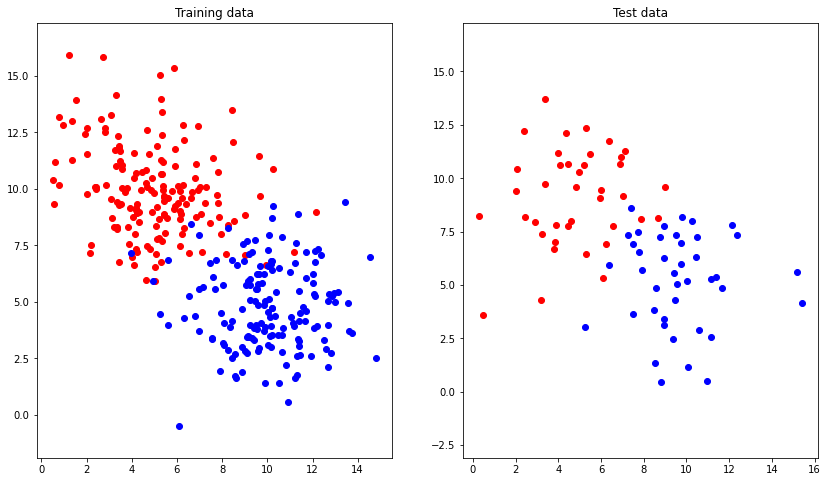

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(M1,mu1, Sigma1,M2, mu2, Sigma2,test_size):
    X1 = np.random.multivariate_normal(mu1, Sigma1, M1)
    y1 = np.zeros((M1,1))
    X2 = np.random.multivariate_normal(mu2, Sigma2, M2)
    y2 = np.ones((M2,1))
    X = np.concatenate((X1, X2), 0)
    y = np.concatenate((y1, y2), 0)
    idx = np.arange(0, M1+M2)
    np.random.shuffle(idx)
    m_train=int((1-test_size)*(M1+M2))
    train_idx = idx[0:m_train]
    test_idx = idx[m_train:]
    X_train = X[train_idx,:]
    X_test = X[test_idx,:]
    y_train = y[train_idx,:]
    y_test = y[test_idx,:]
    return X_train, X_test, y_train, y_test

mu1=np.array([5,10])
mu2=np.array([10,5])
sigma=np.array([[4,0],[0,4]])
M1=200
M2=200
test_size=0.2
X_train, X_test, y_train, y_test = generate_data(M1,mu1, sigma,M2, mu2, sigma,test_size)
def plot_data(X, y, title):
    X_0 = X[(y==0).flat]
    X_1 = X[(y==1).flat]
    plt.plot(X_0[:,0], X_0[:,1], 'ro')
    plt.plot(X_1[:,0], X_1[:,1], 'bo')
    plt.title(title)
    plt.axis('equal')
    
plt.rcParams["figure.figsize"] = (14, 8)
plt.subplot(1,2, 1)
plot_data(X_train, y_train, 'Training data')
plt.subplot(1, 2, 2)
plot_data(X_test, y_test, 'Test data')

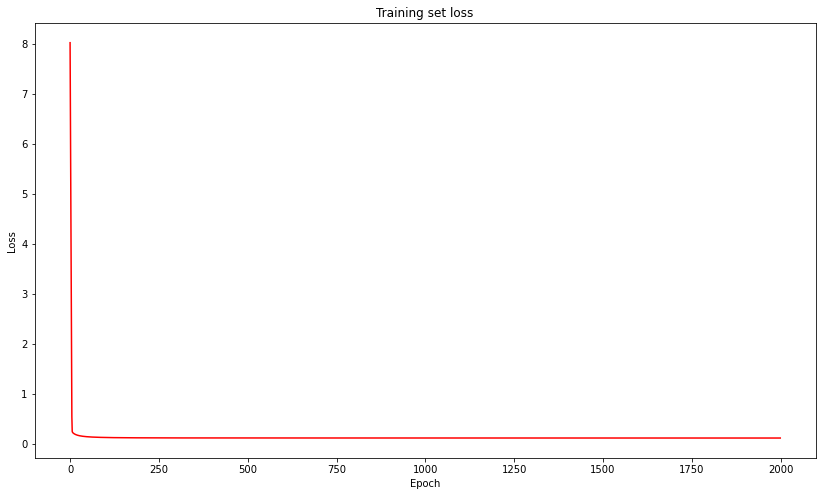

In [2]:
#Place code to train the logistic regression model and plot the results here.

def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)


def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        #print(cost)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

X_train_new = np.concatenate((np.ones((320,1)), X_train), 1)
theta_initial = np.ones((3,1))
theta_final, j_history = train(X_train_new, y_train, theta_initial, 0.05, 2000)

plt.plot(j_history, 'r-')
plt.title('Training set loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

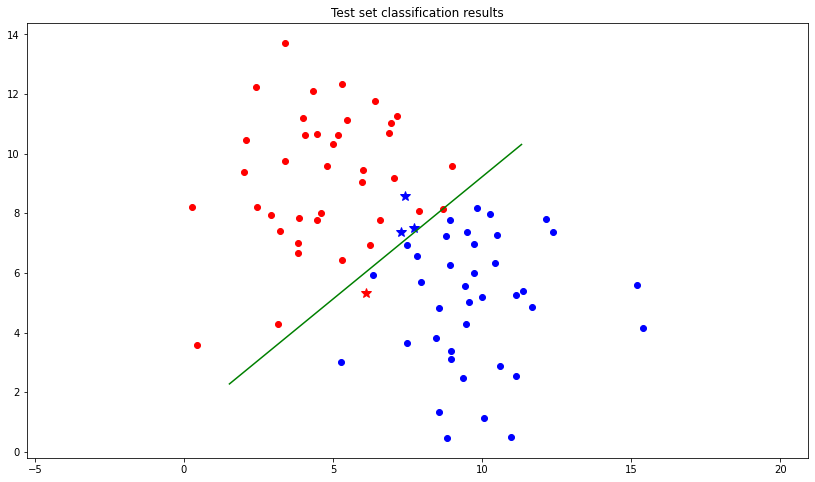

In [3]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

def plot_data_with_correctness(X, y, yhat, theta, title):
    X_0_corr = X[np.logical_and(y == 0, yhat < 0.5).flat]
    X_0_incorr = X[np.logical_and(y == 0, yhat >= 0.5).flat]
    X_1_corr = X[np.logical_and(y == 1, yhat >= 0.5).flat]
    X_1_incorr = X[np.logical_and(y == 1, yhat < 0.5).flat]
    #plt.rcParams["figure.figsize"] = (12, 12)
    plt.plot(X_0_corr[:,0], X_0_corr[:,1], 'ro')
    plt.plot(X_0_incorr[:,0], X_0_incorr[:,1], 'r*', markersize=10)
    plt.plot(X_1_corr[:,0], X_1_corr[:,1], 'bo')
    plt.plot(X_1_incorr[:,0], X_1_incorr[:,1], 'b*', markersize=10)
    point_1, point_2 = boundary_points(X, theta)
    plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
    plt.title(title)
    plt.axis('equal')

X_test_new = np.concatenate((np.ones((80,1)), X_test), 1)
yhat_test = h(X_test_new, theta_final)
plot_data_with_correctness(X_test, y_test, yhat_test, theta_final, 'Test set classification results')

In [4]:
preds = np.where(yhat_test >= 0.5, 1, 0)

accuracy = (preds == y_test).sum() / y_test.shape[0]
print('Testing set accuracy = %f' % accuracy)

Testing set accuracy = 0.950000


NameError: name 'net' is not defined

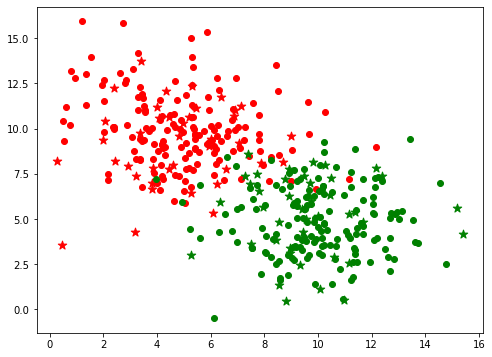

In [12]:
import torch

plt.figure(figsize=(8, 6))
plt.scatter(X_train[(y_train==0).flat,0], X_train[(y_train==0).flat,1], c='r', marker='o', label='Class 0 train')
plt.scatter(X_test[(y_test==0).flat,0], X_test[(y_test==0).flat,1], s=80, c='r', marker='*', label='Class 0 val')
plt.scatter(X_train[(y_train==1).flat,0], X_train[(y_train==1).flat,1], c='g', marker='o', label='Class 1 train')
plt.scatter(X_test[(y_test==1).flat,0], X_test[(y_test==1).flat,1], s=80, c='g', marker='*', label='Class 1 val')
x = np.linspace(1, 15, 100)
y = np.linspace(1, 15, 100)
xv, yv = np.meshgrid(x, y)
X_grid_tensor = torch.tensor(np.concatenate((xv.reshape(-1,1), yv.reshape(-1,1)), 1), dtype=torch.float)
y_grid = net(X_grid_tensor).detach().numpy().reshape(100, 100)
y_grid[y_grid>0.5] = 1
y_grid[y_grid<=0.5] = 0
plt.pcolormesh(x, y, y_grid, alpha=0.1, linewidth=0, antialiased=True)
plt.legend()
plt.title('Fully connected neural network classifier')
plt.show()

In [11]:
pip install torch

     |████████████████████████████████| 137.9 MB 63 kB/s  eta 0:00:01     |██████████████████████████████  | 128.8 MB 1.3 MB/s eta 0:00:07
Note: you may need to restart the kernel to use updated packages.
